In [1]:
cd ..

/home/janek/reasonable-embeddings


In [2]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics

from src.reasoner_mod import *
from src.generate import load_dataset
from src.reasoner import *
from src.utils import *
from src.vis import *

In [3]:
seed = 2022
dataset_path = 'local/out/dataset/sub-100.json'
ts = timestr()
train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)

emb_size = 10
hidden_size = 16
epoch_count = 15
test_epoch_count = 10
batch_size = 32

T.manual_seed(seed)

trained_reasoner = ModifiedReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
encoders = [ModifiedEmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in train_onto]

print(f'created reasoner with {paramcount(trained_reasoner)} parameters')
print(f'created {len(encoders)} encoders with {paramcount(encoders[0])} parameters each')

train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=epoch_count, batch_size=batch_size, not_nn_loss_weight=20)

created reasoner with 3283 parameters
created 40 encoders with 1270 parameters each
train epoch 00/15 | batch 2001/2000 | loss 1.1824 | val loss 1.1911 | acc 0.2131 | f1 0.3514 | prec 0.2131 | recall 1.0000 | roc auc 0.5142 | pr auc 0.2463 | elapsed 23.90s
train epoch 01/15 | batch 2001/2000 | loss 0.8758 | val loss 0.6810 | acc 0.8098 | f1 0.1952 | prec 0.9946 | recall 0.1082 | roc auc 0.5636 | pr auc 0.3863 | elapsed 68.22s
train epoch 02/15 | batch 2001/2000 | loss 0.5835 | val loss 0.5114 | acc 0.8247 | f1 0.3294 | prec 0.8913 | recall 0.2021 | roc auc 0.7173 | pr auc 0.5297 | elapsed 73.13s
train epoch 03/15 | batch 2001/2000 | loss 0.4496 | val loss 0.4186 | acc 0.8438 | f1 0.4939 | prec 0.7974 | recall 0.3578 | roc auc 0.8062 | pr auc 0.6503 | elapsed 69.78s
train epoch 04/15 | batch 2001/2000 | loss 0.3485 | val loss 0.3437 | acc 0.8740 | f1 0.6275 | prec 0.8482 | recall 0.4979 | roc auc 0.8604 | pr auc 0.7536 | elapsed 76.37s
train epoch 05/15 | batch 2001/2000 | loss 0.2717 |

In [4]:
input = T.rand(10)
print(input)
output = trained_reasoner.not_nn(trained_reasoner.not_nn(input))
print(output)

tensor([0.7046, 0.9691, 0.6363, 0.5471, 0.4491, 0.2415, 0.8017, 0.2631, 0.6155,
        0.7288])
tensor([0.7049, 0.9507, 0.6339, 0.5657, 0.4329, 0.2440, 0.8178, 0.2649, 0.6437,
        0.7312], grad_fn=<SqueezeBackward3>)


In [5]:
trained_reasoner.not_nn.weight

Parameter containing:
tensor([[-4.2693e-01,  2.0899e-01,  4.6879e-01, -1.5485e-01,  7.7500e-02,
         -2.3362e-01,  2.4913e-01,  4.2805e-01,  2.1370e-01,  1.7202e-01],
        [ 2.9857e-01, -3.6220e-01,  4.5432e-02,  1.5135e-02,  3.2183e-01,
          4.2775e-01,  3.8752e-01,  1.6826e-01,  4.6730e-01, -2.6333e-01],
        [ 5.7401e-01,  3.7431e-02,  4.6594e-04,  1.4381e-01, -1.7608e-02,
         -5.6280e-01, -2.9703e-01,  1.7120e-01,  2.4681e-01, -3.4441e-01],
        [-1.1791e-01,  2.3170e-03,  1.9294e-01, -4.5723e-01,  3.3685e-01,
         -3.3090e-01,  6.4790e-02, -5.1279e-01, -5.9393e-02, -5.1460e-01],
        [ 6.4255e-02,  3.3272e-01, -7.0636e-02,  3.1533e-01, -1.3788e-01,
         -1.8104e-01,  5.2232e-01, -4.9081e-01,  3.7862e-01,  3.7877e-01],
        [-3.0415e-01,  4.4896e-01, -6.7181e-01, -2.7602e-01, -1.5487e-01,
          1.3376e-01, -9.8918e-02,  1.3984e-01,  3.2961e-01, -2.5571e-01],
        [ 2.5113e-01,  3.6475e-01, -3.0757e-01,  1.7122e-01,  4.1939e-01,
         -

In [10]:
print(T.round(T.matmul( trained_reasoner.not_nn.weight, trained_reasoner.not_nn.weight)*1000)/1000)

tensor([[ 1.0000e+00,  1.0000e-03, -0.0000e+00, -2.0000e-03, -1.0000e-03,
          1.0000e-03,  1.0000e-03,  2.0000e-03, -1.0000e-03, -0.0000e+00],
        [ 1.0000e-03,  1.0000e+00, -1.9000e-02, -6.0000e-03,  1.0000e-03,
         -1.5000e-02,  0.0000e+00,  6.0000e-03,  8.0000e-03, -1.1000e-02],
        [ 3.0000e-03, -0.0000e+00,  9.9600e-01, -3.0000e-03, -4.0000e-03,
         -0.0000e+00,  1.0000e-03,  1.0000e-03,  3.0000e-03, -1.0000e-03],
        [ 1.0000e-03,  1.0000e-03,  1.5000e-02,  1.0070e+00, -1.0000e-03,
          1.5000e-02,  2.0000e-03, -5.0000e-03, -9.0000e-03,  8.0000e-03],
        [ 1.0000e-03, -0.0000e+00, -1.8000e-02, -4.0000e-03,  1.0010e+00,
         -1.7000e-02,  1.0000e-03,  3.0000e-03,  9.0000e-03, -1.0000e-02],
        [ 3.0000e-03, -1.0000e-03,  1.0000e-03,  0.0000e+00, -2.0000e-03,
          1.0010e+00,  2.0000e-03, -3.0000e-03, -0.0000e+00,  1.0000e-03],
        [ 0.0000e+00,  1.0000e-03,  1.3000e-02,  5.0000e-03, -1.0000e-03,
          1.2000e-02,  1.0060e+0

In [7]:
## --- TESTING
trained_test_encoders = {}
T.manual_seed(seed)
random_reasoner = ReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
test_logger = TrainingLogger(validate=True, metrics=batch_stats)

for reasoner_name, reasoner in [('trained reasoner', trained_reasoner), ('random reasoner', random_reasoner)]:
    print(reasoner_name)
    T.manual_seed(seed)
    trained_test_encoders[reasoner_name] = test_encoders = [EmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in test_onto]
    if reasoner_name == 'trained reasoner':
        train_mod(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger, not_nn_loss_weight=0.1)
    else:
        train(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger)

trained reasoner
train epoch 00/10 | batch 1251/1250 | loss 1.2217 | val loss 1.2217 | acc 0.6415 | f1 0.3935 | prec 0.3112 | recall 0.5348 | roc auc 0.6482 | pr auc 0.4859 | elapsed 16.91s
train epoch 01/10 | batch 1251/1250 | loss 1.0248 | val loss 0.8000 | acc 0.7315 | f1 0.4743 | prec 0.4128 | recall 0.5573 | roc auc 0.7324 | pr auc 0.5629 | elapsed 36.96s
train epoch 02/10 | batch 1251/1250 | loss 0.6762 | val loss 0.5267 | acc 0.8073 | f1 0.5761 | prec 0.5521 | recall 0.6023 | roc auc 0.8152 | pr auc 0.6666 | elapsed 37.85s
train epoch 03/10 | batch 1251/1250 | loss 0.4587 | val loss 0.3657 | acc 0.8639 | f1 0.6793 | prec 0.6962 | recall 0.6632 | roc auc 0.8793 | pr auc 0.7689 | elapsed 35.89s
train epoch 04/10 | batch 1251/1250 | loss 0.3313 | val loss 0.2726 | acc 0.9003 | f1 0.7584 | prec 0.8017 | recall 0.7195 | roc auc 0.9207 | pr auc 0.8443 | elapsed 36.73s
train epoch 05/10 | batch 1251/1250 | loss 0.2564 | val loss 0.2170 | acc 0.9227 | f1 0.8107 | prec 0.8671 | recall 0.

In [8]:
with T.no_grad():
    idx_te, X_te, y_te = data_te
    _, _, Y_te_good = eval_batch_mod(trained_reasoner, trained_test_encoders['trained reasoner'], X_te, y_te, idx_te)
    _, _, Y_te_rand = eval_batch(random_reasoner, trained_test_encoders['random reasoner'], X_te, y_te, idx_te)

local/out/exp/20240625T174345


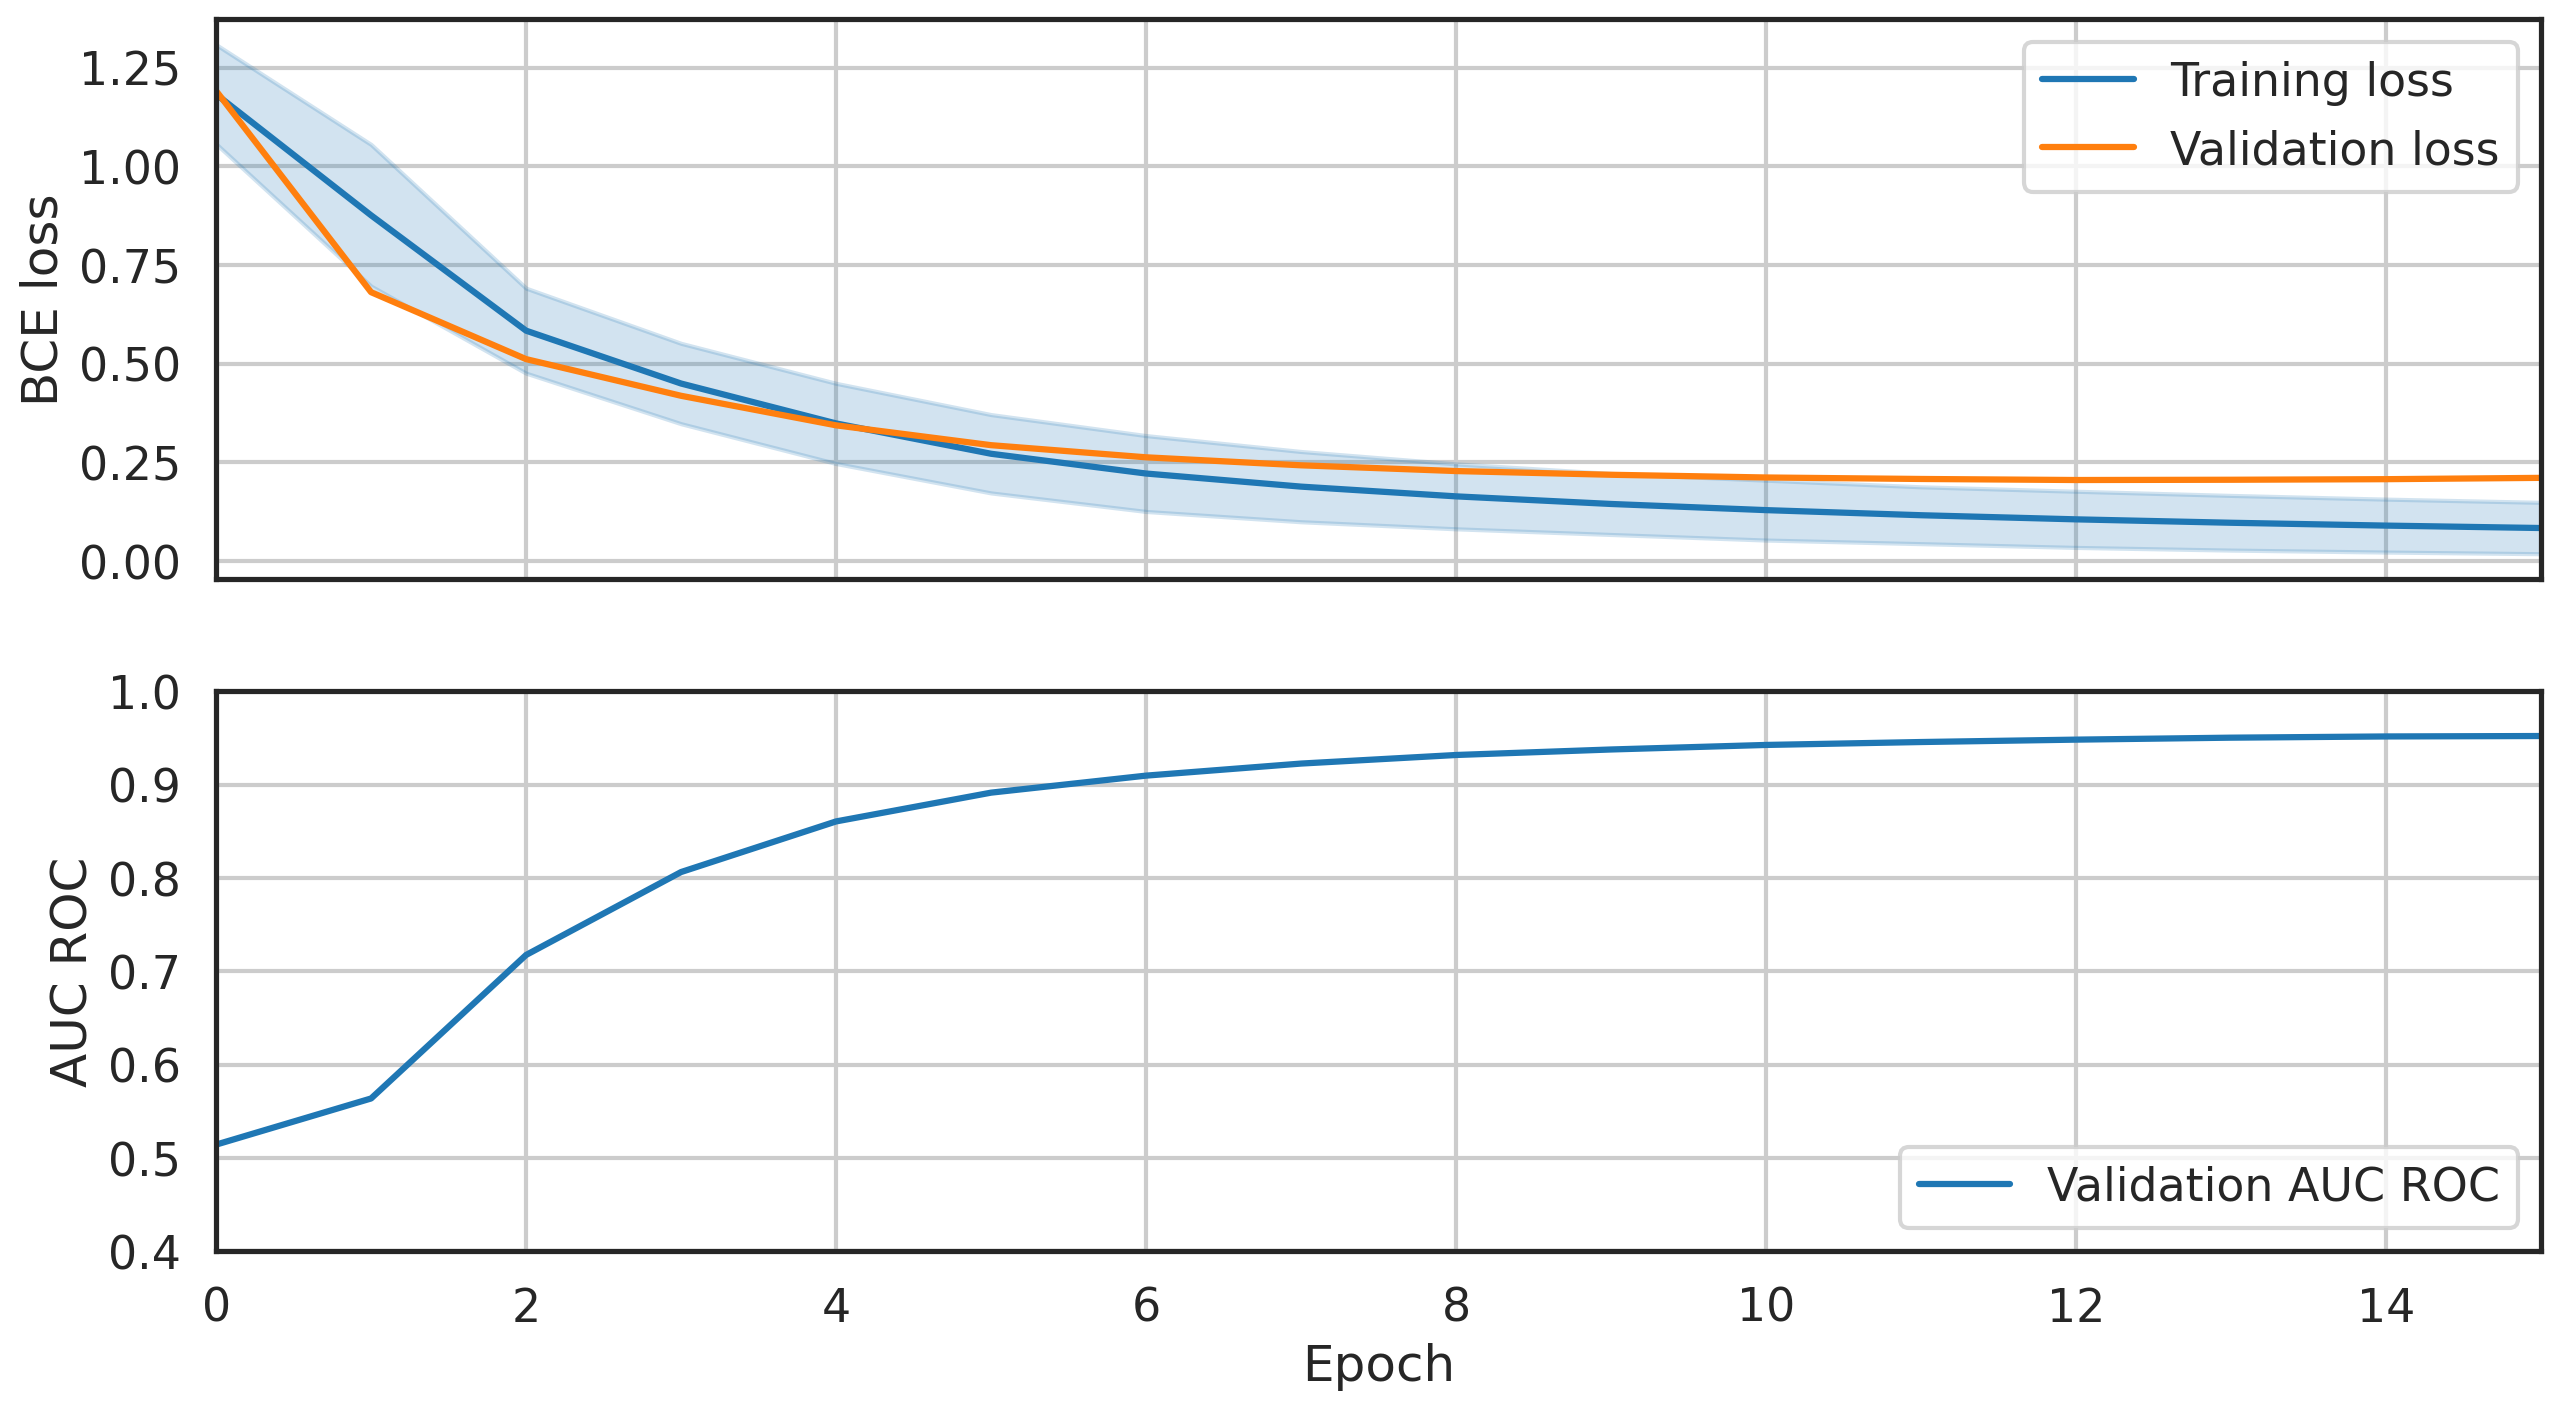

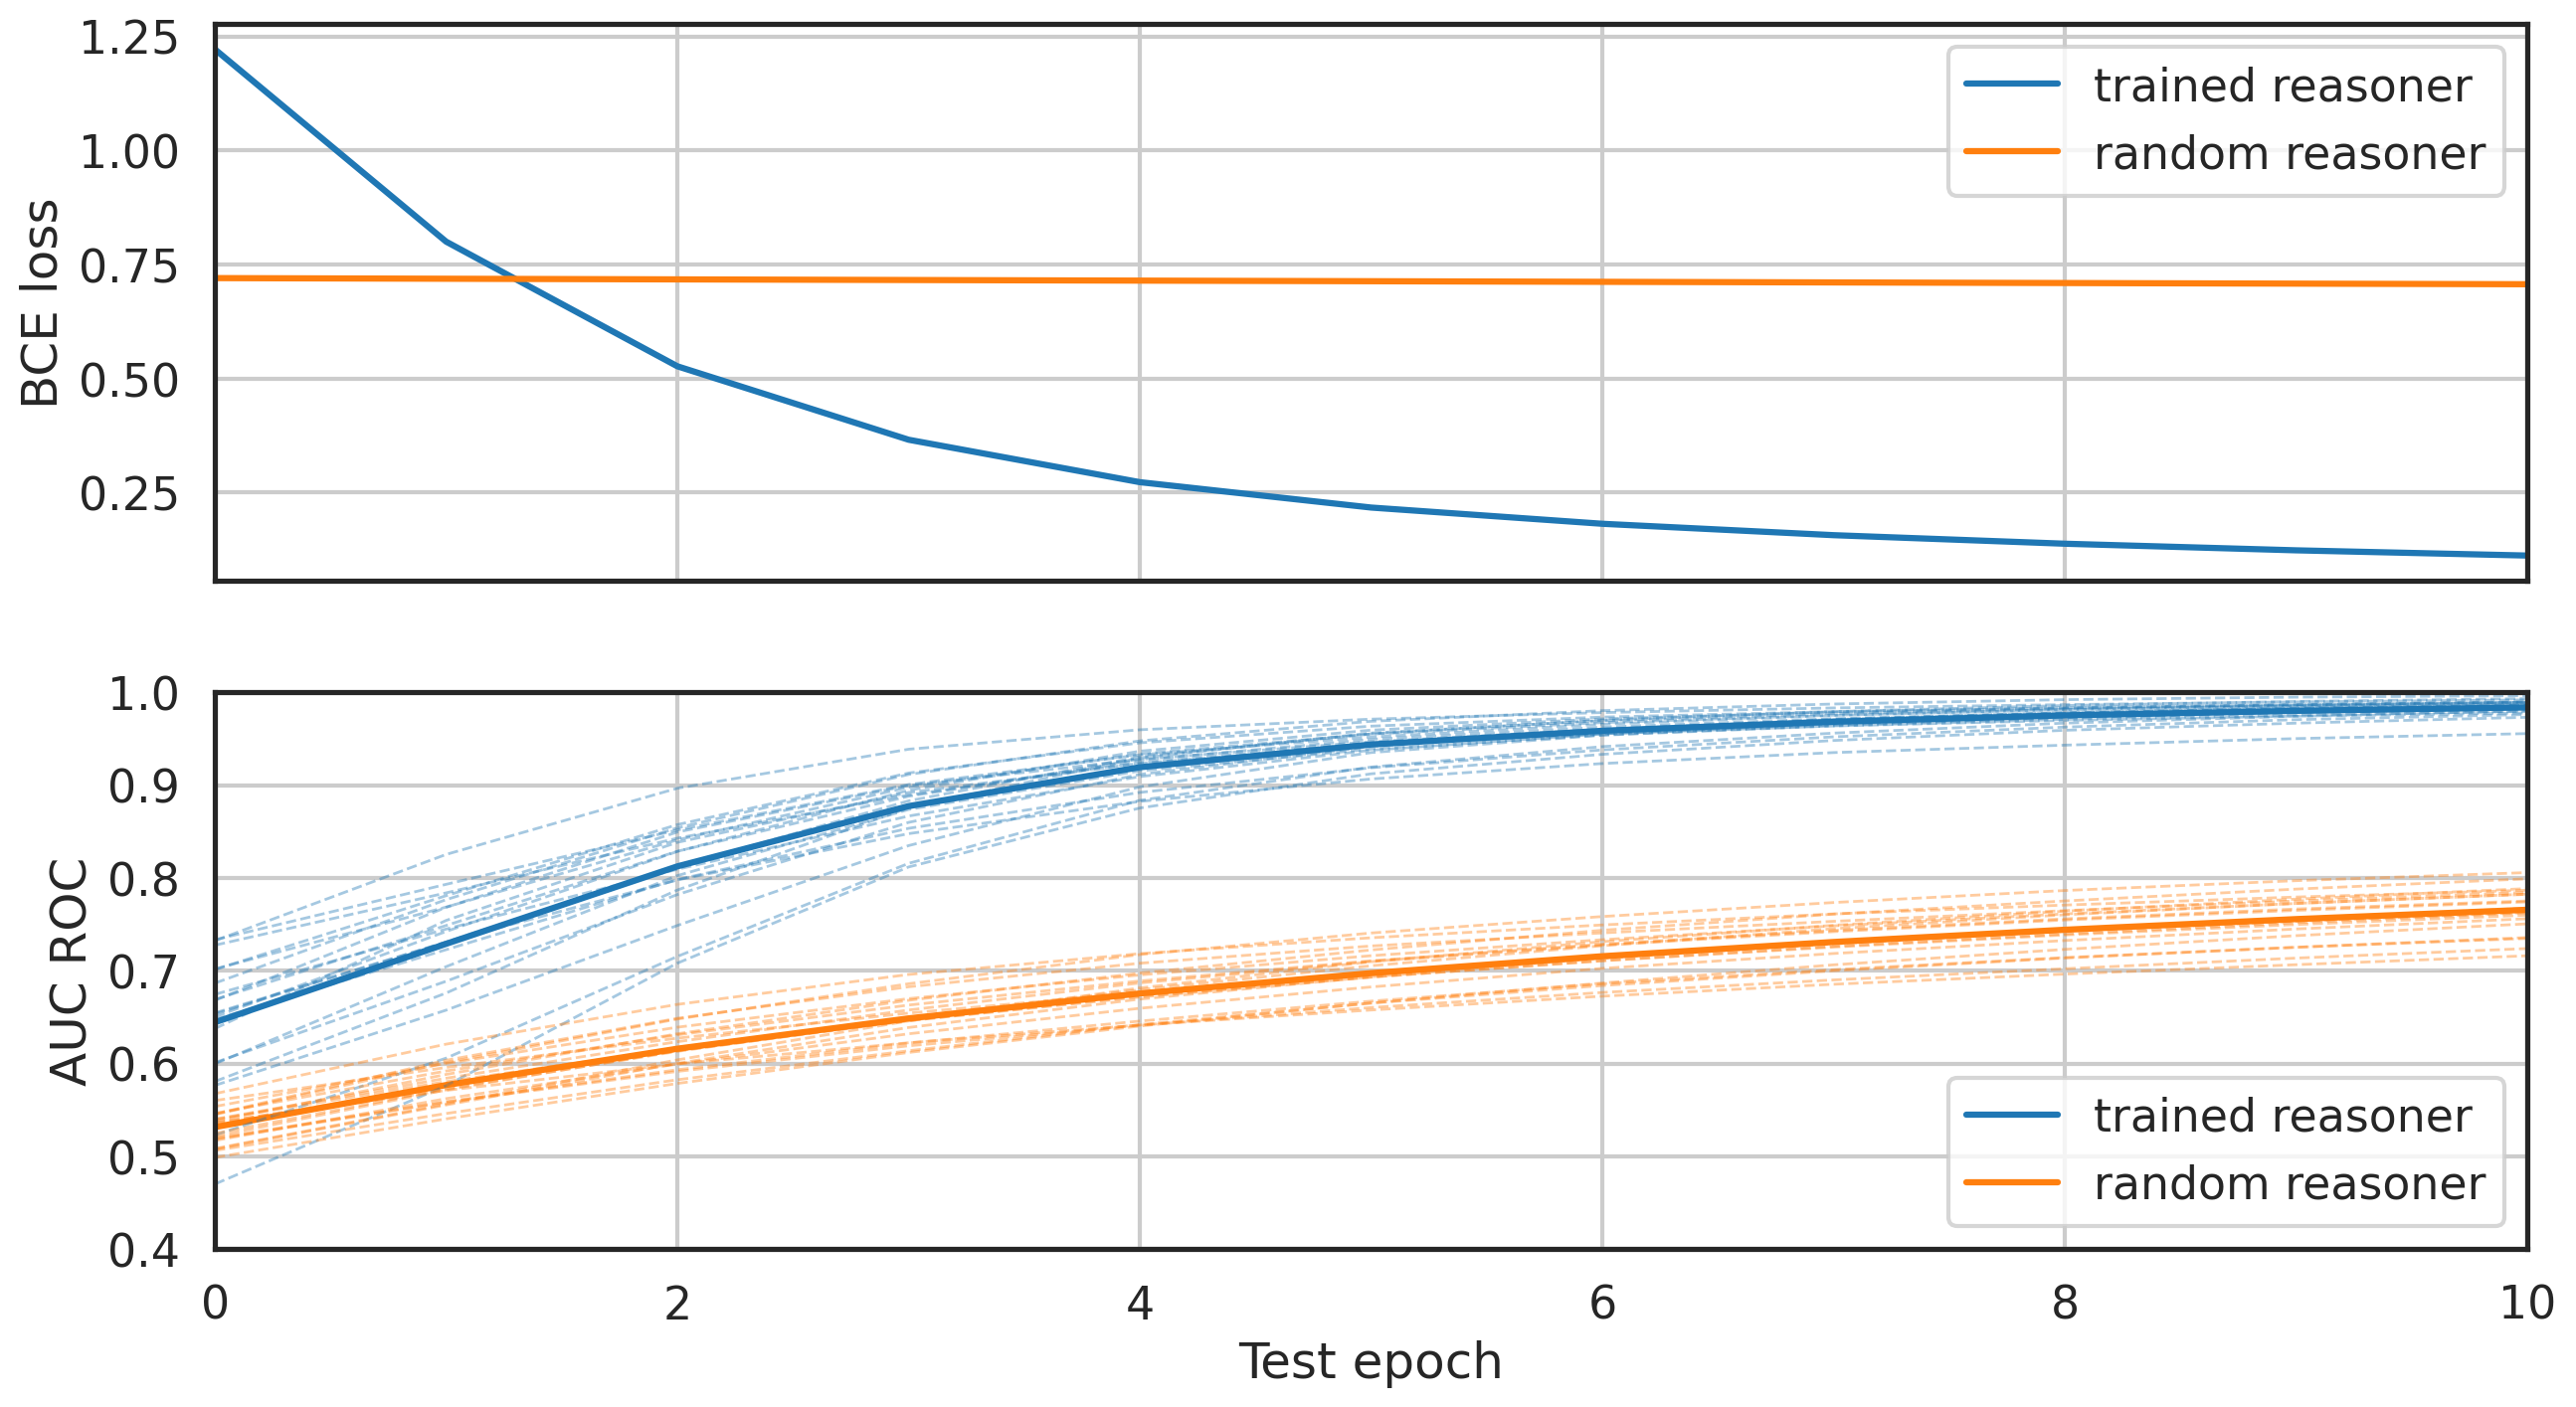

             mean       std     micro
acc      0.961500  0.016529  0.961500
prec     0.958066  0.030526  0.958131
recall   0.858922  0.049291  0.860511
f1       0.905473  0.039106  0.906701
auc_roc  0.983673  0.008955  0.984688
auc_pr   0.963258  0.018556  0.965715
             mean       std     micro
acc      0.287375  0.027590  0.287375
prec     0.231894  0.030550  0.232159
recall   0.987012  0.012017  0.987236
f1       0.374628  0.039972  0.375917
auc_roc  0.765613  0.024266  0.766383
auc_pr   0.558881  0.052247  0.563443


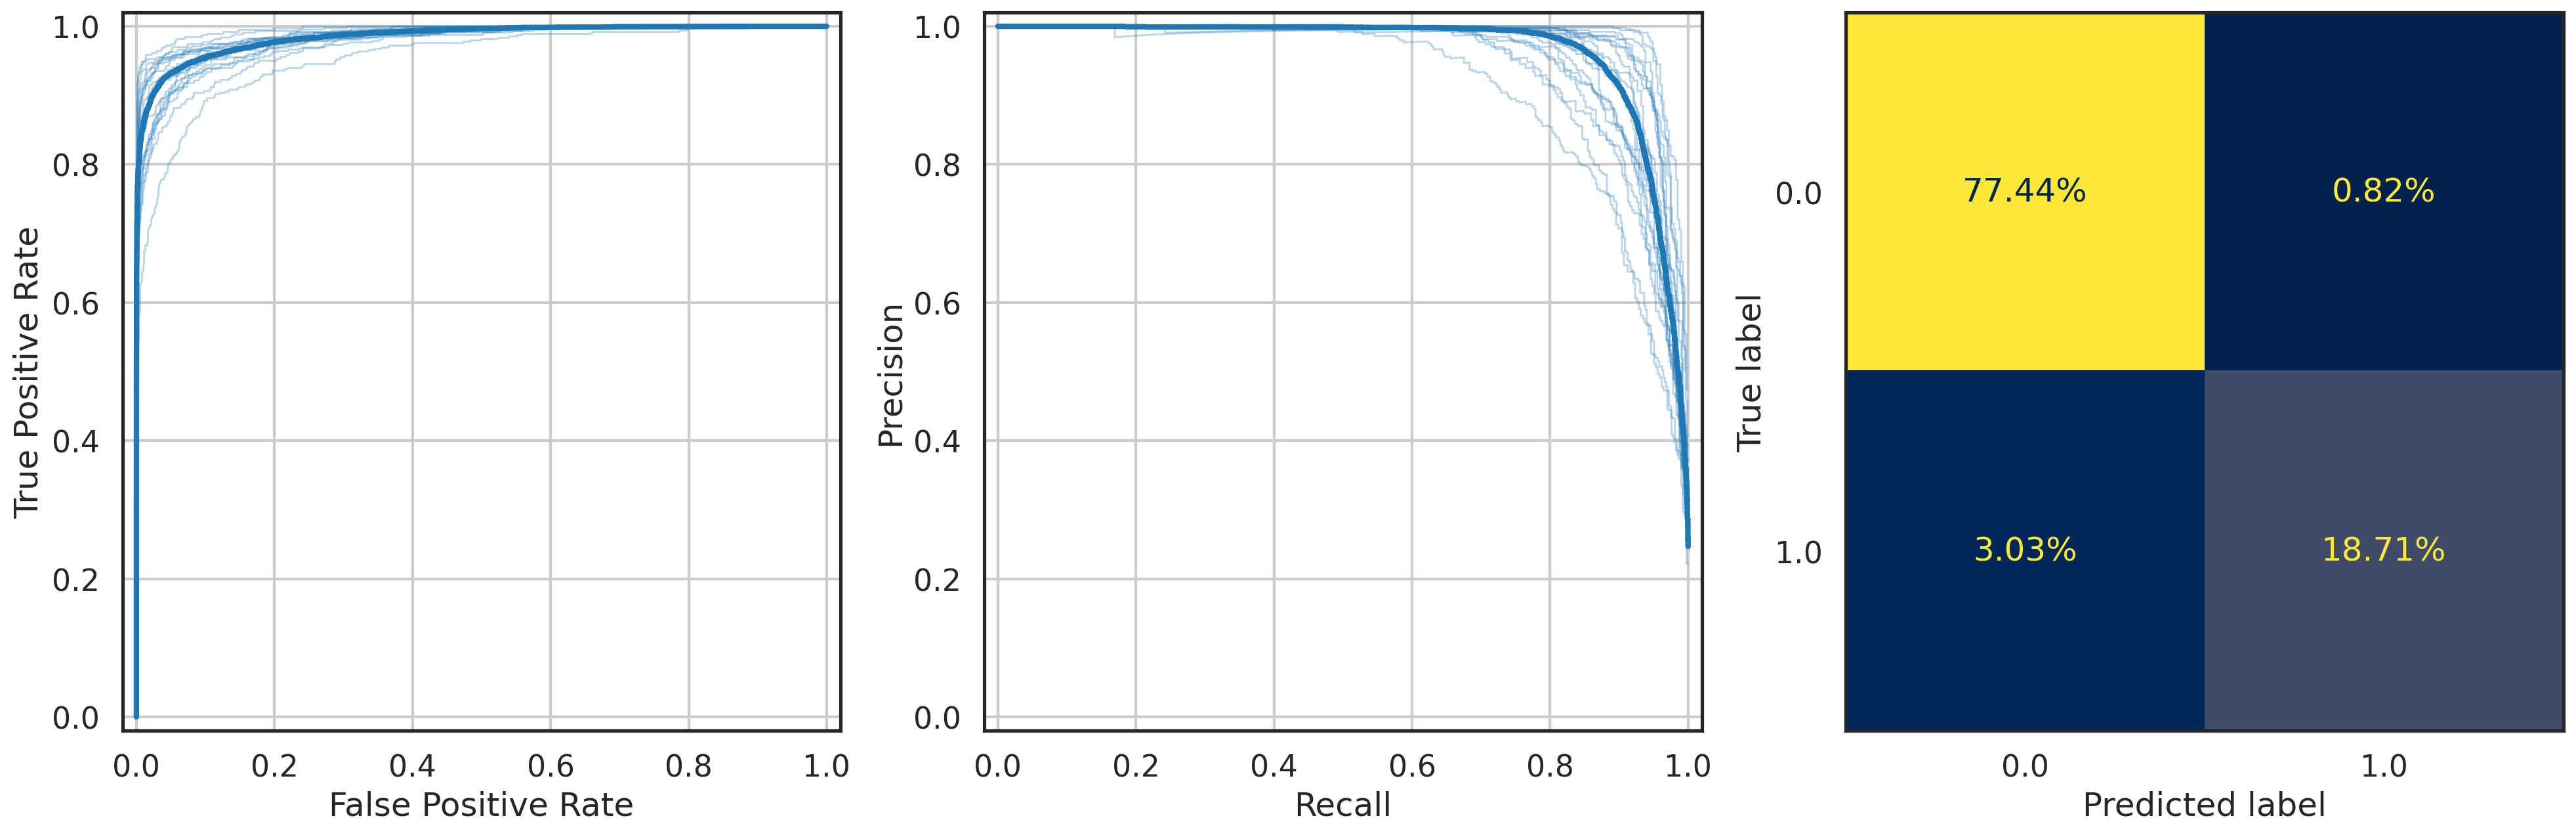

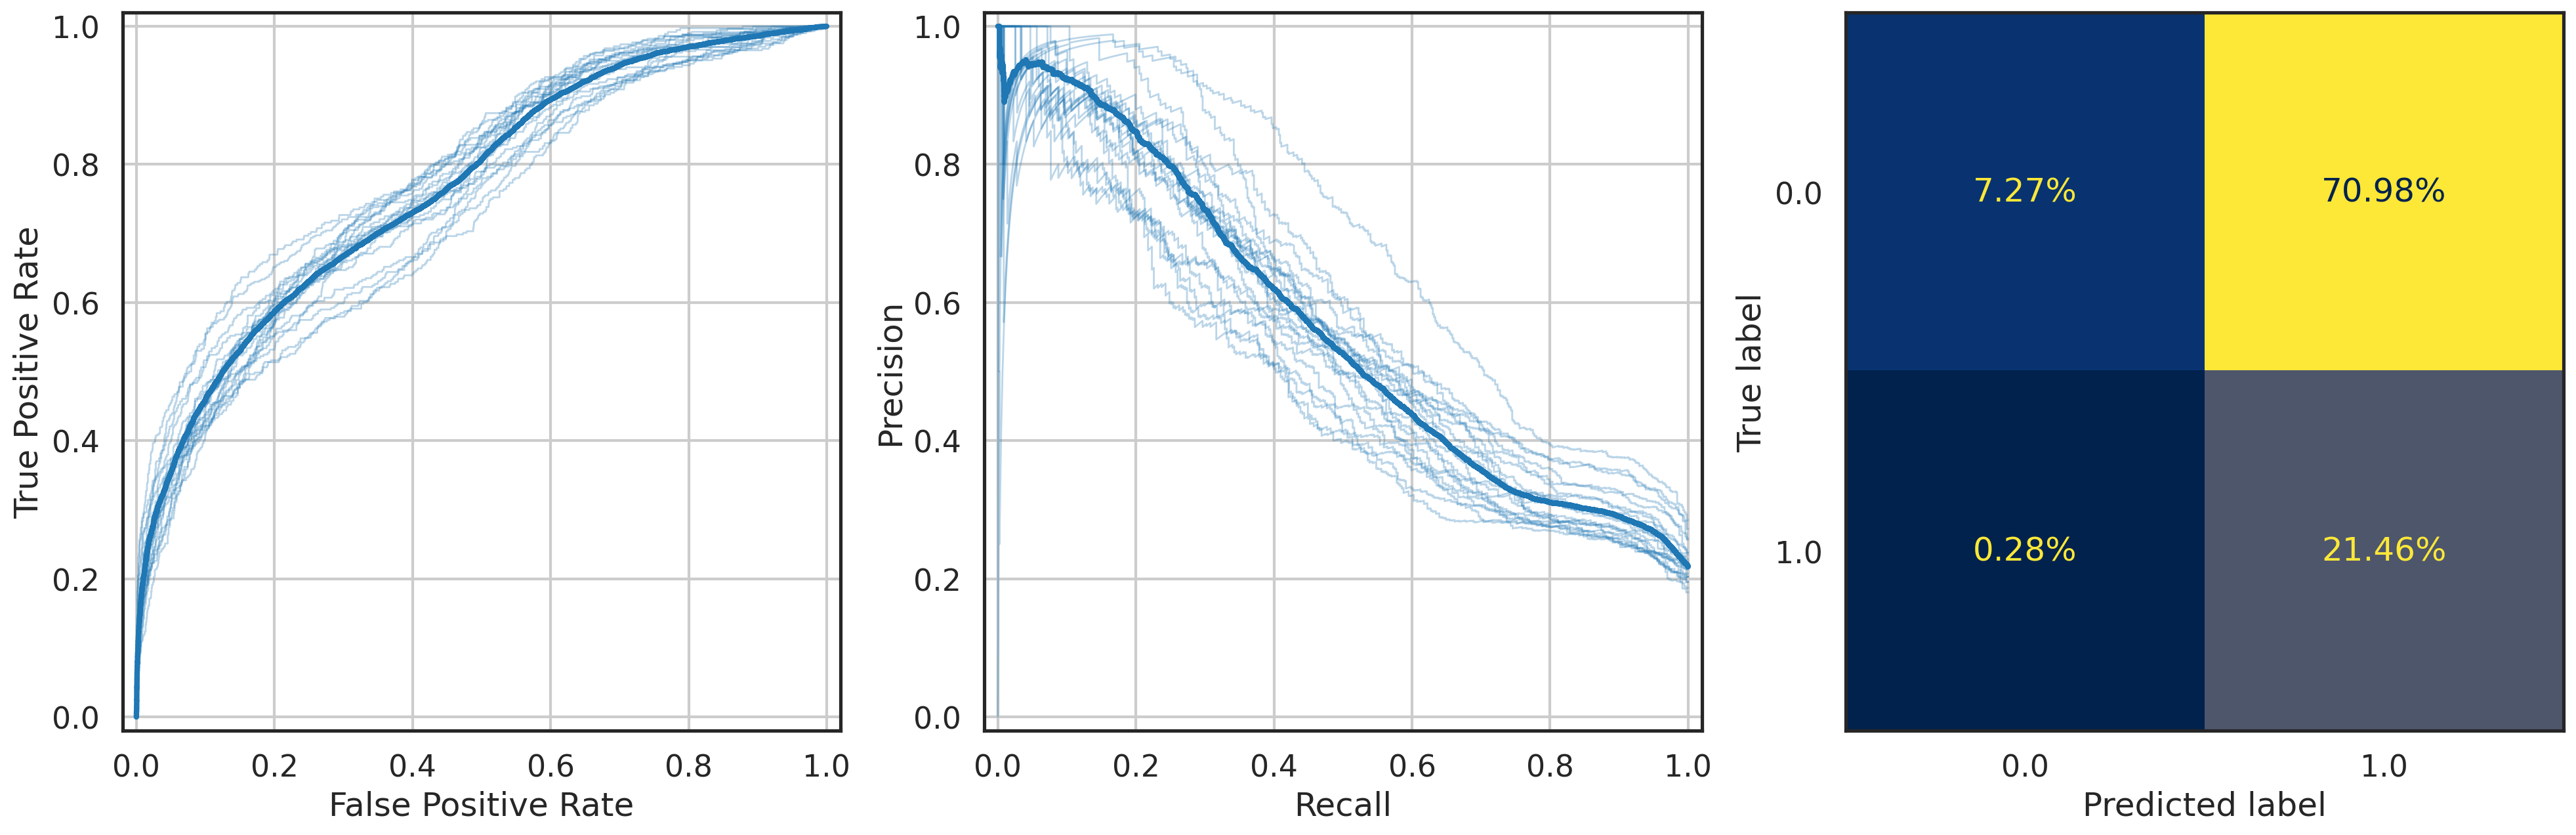

In [9]:
base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

T.save(trained_reasoner.state_dict(), base+'/reasoner.pt')
df_tr = pd.DataFrame(train_logger.history_tr)
df_vl = pd.DataFrame(train_logger.history_vl)
df_tr.to_csv(base+'/train.csv', index=False)
df_vl.to_csv(base+'/valid.csv', index=False)
plot_train_history(df_tr, df_vl, save=base+'/train.png')

test_history_by_onto = pd.DataFrame(test_logger.history_vl_by_onto)
test_history = pd.DataFrame(test_logger.history_vl)
test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te_good=Y_te_good, Y_te_rand=Y_te_rand))
test_history.to_csv(base+'/test.csv', index=False)
test_history_by_onto.to_csv(base+'/test-grouped.csv', index=False)
test_results.to_csv(base+'/test-results.csv', index=False)
plot_test_history(test_history, test_history_by_onto, save=base+'/test.png')
print(report(test_onto, y_te, np.array(Y_te_good), idx_te, save=base+'/%-trained'))
print(report(test_onto, y_te, np.array(Y_te_rand), idx_te, save=base+'/%-random'))